# Case 3: network with small features

Import the definitions of the plot routines:

In [1]:
import plotroutines as pr
import matplotlib.pyplot as plt
plt.rc('text', usetex=False) # don't use Latex as Binder currently fails, see https://github.com/jupyterhub/binderhub/issues/1143

Choose a refinement index, `0` indicating the coarse meshes (30k cells), `1` the fine ones (150k cells):

In [2]:
ref_index = "1"

Choose the places and methods that should be evaluated. The names have to be consistent with the folder names in `../results`:

In [3]:
# once the Latex issue is fixed, replace "_" by "\_"
places_and_methods = {
    "UiB": ["TPFA", "MPFA", "MVEM", "RT0"],
    "USTUTT": ["MPFA", "TPFA_Circ"],
    "LANL": ["MFD"],
    "UNICE_UNIGE": ["VAG_Cont", "HFV_Cont", "VAG_Disc", "HFV_Disc"],
    "ETHZ_USI": ["FEM_LM"],
    "UNICAMP": ["Hybrid_Hdiv"],
    "UNIL_USI": ["FE_AMR_AFC"],
    "INM": ["EDFM"],
    "DTU": ["FEM_COMSOL"]
};

Plot the hydraulic head over *line* by looping through all places and methods, taking the data from the files `dol_line_{0,1}_refinement_{0,1}.csv` in the corresponding folders. This corresponds to Figure 12 in the paper.

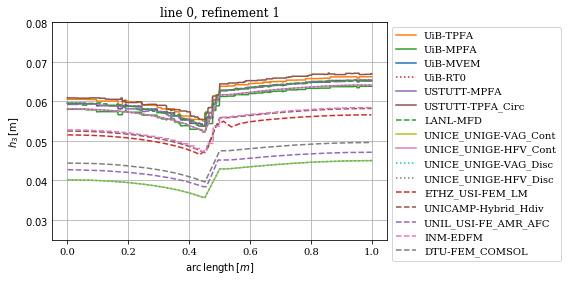

In [4]:
fig = plt.figure()
ax = fig.add_subplot(ylim=(0.03-0.005, 0.07+0.01))
title = "line 0, refinement " + ref_index

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dol_line_0_refinement_" + ref_index + ".csv"
        label = place + "-" + method

        pr.plot_over_line(data, label, ref_index,
                          pr.id_p_0_matrix, title, ax,
                          pr.linestyle[place][method], pr.color[place][method],
                          fmt="%1.2f")

Plot the mean concentration in fracture 3 over *time*, taking the data from the files `dot_refinement_{0,1}.csv`. This corresponds to Figure 13 in the paper.

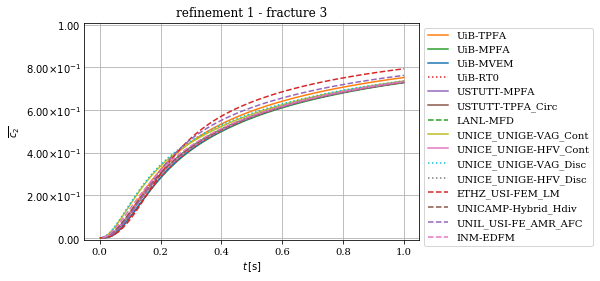

In [5]:
fracture_id = 3
fig = plt.figure()
ax = fig.add_subplot(ylim=(0-0.01, 1+0.01))
title = "refinement " + ref_index

# remove DTU as they didn't provide concentration results
if places_and_methods.get("DTU"):
    places_and_methods.pop("DTU")

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dot_refinement_" + ref_index + ".csv"
        label = place + "-" + method

        pr.plot_over_time(data, label, ref_index,
                          fracture_id, title, ax,
                          pr.linestyle[place][method], pr.color[place][method])